# Optimizing python code with f2py


In the lecture on profiling python code you have learned how to identfiy which parts of your code are most time-consuming. 

*Usually this will be only a very small part of your code*

It is thus this small piece of code you need to optimize. Essentially, the key to success is to replace the pure python code with code that is written in a faster, compiled language.

You can do this by directly interfacing to C or Fortran code - Michael has discussed numpy and cython -- I will tell you about this in this lecture on ``f2py``. 

##When to use what?

- If your intensive calculations involve arrays: numpy

- If your intensive calculation involves optimization/root finding: scipy

- If this all fails: cython or f2py

This usually pertains to situations where very many steps need to be gone through successively.

## Example: solving an equation of motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = 1.0
v = -np.sqrt(2)*0.5

StepNum = 100000
pos_array = np.ndarray((StepNum),dtype = float)

def force(x):
    """ This function returns the force acting on a mass at x.
        The force is derived from a double well potential -0.5*x**2 + 0.25*x**4
        input: x; position of the particle
        output: force; the force acting on the particle
    """
    return x - x**3
    
def move_part(x, v):    
    h = 0.001 #h is the time step    
    temp_f = force(x)
    for t in range(StepNum):
        v = v + 0.5*h*temp_f
        x = x + h*v
        temp_f = force(x)
        v = v + 0.5*h*temp_f
        pos_array[t] = x
    return pos_array
    

10 loops, best of 3: 99.9 ms per loop


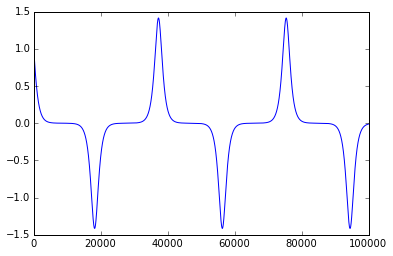

In [3]:
%timeit pos_array = move_part(x,v)
pos_array = move_part(x,v)
plt.plot(pos_array)
plt.show()

##f2py howto

- Write your fortran routines (here: verlet.f90)

- compile using 
        f2py -c --f90flags="..." verlet.f90 -m verlet
        
This produces: verlet.so

- In your python file: 
        import verlet
        
- For the interface:
        print (verlet.verlet.__doc__)
        
- Using this, you can make calls to the routines in the fortran-compiled module        

In [7]:
import verlet
print (verlet.verlet.__doc__)

verlet(x,v,step_num,pos_array)

Wrapper for ``verlet``.

Parameters
----------
x : input float
v : input float
step_num : input int
pos_array : input rank-1 array('d') with bounds (f2py_pos_array_d0)



1000 loops, best of 3: 1.13 ms per loop


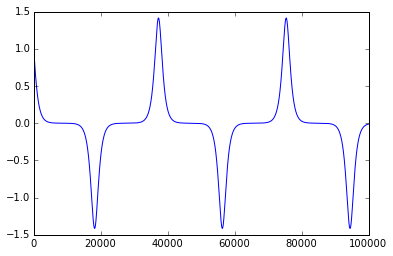

In [8]:
x = 1.0
v = -np.sqrt(2)*0.5
pos_array = np.ndarray((StepNum),dtype = float)
%timeit verlet.verlet(x,v,StepNum, pos_array)

plt.plot(pos_array)
plt.show()